In the next few sets we will pre-process the data and alnalyze it for any Null values, duplicates and out-liers

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

import sqlite3

%matplotlib inline

In [4]:
connection = sqlite3.connect("weather_data.db")
weather_df = pd.read_sql_query("SELECT * from Weather", connection)
connection.close()

In [5]:
weather_df.head()

,average_temperature,average_humidity,average_dewpoint,average_barometer,average_windspeed,average_gustspeed,average_direction,rainfall_for_month,rainfall_for_year,maximum_rain_per_minute,maximum_temperature,minimum_temperature,maximum_humidity,minimum_humidity,maximum_pressure,minimum_pressure,maximum_windspeed,maximum_gust_speed,maximum_heat_index,date
0,43.2,0.58,27.7,30.2,1.5,2.9,33.0,0.0,5.98,0.0,61.3,25.5,0.89,0.30,30.278,30.090,8.1,11.5,61.3,2020-10-01
1,56.9,0.25,17.8,29.9,5.7,9.2,274.0,0.0,5.98,0.0,70.9,34.1,0.72,0.10,30.131,29.797,16.1,26.5,73.2,2020-10-02
2,44.6,0.54,27.9,30.0,2.0,3.7,58.0,0.0,5.98,0.0,61.0,27.4,0.80,0.31,30.090,29.852,11.5,17.3,61.0,2020-10-03
3,52.2,0.42,23.1,30.0,4.2,6.6,232.0,0.0,5.98,0.0,75.4,28.5,0.86,0.12,30.095,29.825,19.6,26.5,75.6,2020-10-04
4,60.4,0.19,15.3,29.8,6.4,10.6,253.0,0.0,5.98,0.0,74.3,37.8,0.44,0.09,29.891,29.691,20.7,33.4,74.0,2020-10-05


In [7]:
df = weather_df[['average_temperature', 'maximum_temperature', 'minimum_temperature']]
df.head()

,average_temperature,maximum_temperature,minimum_temperature
0,43.2,61.3,25.5
1,56.9,70.9,34.1
2,44.6,61.0,27.4
3,52.2,75.4,28.5
4,60.4,74.3,37.8


In [10]:
df.isnull().sum()

average_temperature    0
maximum_temperature    0
minimum_temperature    0
dtype: int64

In [12]:
df[df.duplicated()]

,average_temperature,maximum_temperature,minimum_temperature


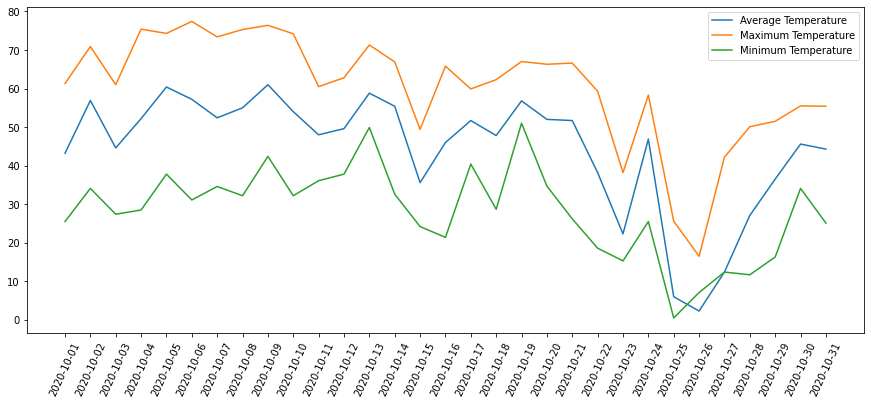

In [16]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=65)
plt.plot(weather_df['date'], df['average_temperature'])
plt.plot(weather_df['date'], df['maximum_temperature'])
plt.plot(weather_df['date'], df['minimum_temperature'])

plt.legend(['Average Temperature', 'Maximum Temperature', 'Minimum Temperature'])
plt.show()

In the next few cells we will use scikit-learn module to split our data into training data and test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#we now define the dependent variable y and independent variabl x for splitting data
y = df[['average_temperature']]
x = df[['maximum_temperature', 'minimum_temperature']]

In [19]:
'''we now use train_test_split function to split the data. This gives us:
training set of independent variable, testing set of independent variable
training set of dependent variable, testing set of dependent variable'''

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In the next few cells we will build and train our model. We will use linear regression model from scikit module

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [21]:
#fit() function of LinearRegression is used to train the model
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# we are now trying to predict the average temperature of last row from training data
x_train.iloc[-1:]

,maximum_temperature,minimum_temperature
6,73.4,34.6


In [23]:
model.predict([[73.4, 34.6]])

array([[56.83538364]])

In [24]:
y_train.iloc[-1:]

,average_temperature
6,52.4


In the next few cells we will evaluate the model using test data

In [25]:
print(x_test)
print(y_test)

    maximum_temperature  minimum_temperature
27                 50.1                 11.7
15                 65.8                 21.4
23                 58.3                 25.5
17                 62.3                 28.7
8                  76.4                 42.4
9                  74.2                 32.2
29                 55.5                 34.1
24                 25.6                  0.5
12                 71.3                 49.9
0                  61.3                 25.5
    average_temperature
27                 27.1
15                 46.0
23                 46.9
17                 47.8
8                  61.0
9                  54.0
29                 45.6
24                  6.0
12                 58.8
0                  43.2


In [26]:
x_test.iloc[-1:]

,maximum_temperature,minimum_temperature
0,61.3,25.5


In [29]:
model.predict([[61.3, 25.5]])

array([[43.50950597]])

In [30]:
y_test.iloc[-1:]

,average_temperature
0,43.2


In next few cells we will calculate Mean Squared Error(MSE) of the model

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
training_set_predictions = model.predict(x_train)
print(training_set_predictions)

[[59.09445824]
 [49.9840955 ]
 [57.97018954]
 [51.12830802]
 [50.77542314]
 [21.67353362]
 [54.77564467]
 [44.24724935]
 [ 1.85532566]
 [55.21688484]
 [38.59542482]
 [23.10984321]
 [60.44676061]
 [39.04047681]
 [47.69525036]
 [57.00381816]
 [48.25735567]
 [34.24785514]
 [31.7971847 ]
 [51.74953432]
 [56.83538364]]


In [33]:
testing_set_predictions = model.predict(x_test)
print(testing_set_predictions)

[[28.47290432]
 [44.70450536]
 [41.3393229 ]
 [45.84092   ]
 [62.92511467]
 [56.20808436]
 [43.63537159]
 [ 5.12167372]
 [63.00459958]
 [43.50950597]]


In [34]:
MSE_train = mean_squared_error(y_train, training_set_predictions)
MSE_test = mean_squared_error(y_test, testing_set_predictions)

In [35]:
print(f'MSE_train = {MSE_train}')
print(f'MSE_test = {MSE_test}')

MSE_train = 12.324678872197488
MSE_test = 6.93096733388454


In the next few cells we will save our model for future use
We will use pickel library to serialize our model

In [36]:
import pickle

In [37]:
filepath = 'regression_model.ssv'
pickle.dump(model, open(filepath, 'wb'))